# Diplodatos Kaggle Competition

We present this peace of code to create the baseline for the competition, and as an example of how to deal with these kind of problems. The main goals are that you:

1. Learn
1. Try different models and see which one fits the best the given data
1. Get a higher score than the given one in the current baseline example
1. Try to get the highest score in the class :)

In [8]:
# Import the required packages
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read the *original* dataset...

In [9]:
original_df = pd.read_csv('../data/train.csv')

In [10]:
original_df.columns

Index(['TripType', 'VisitNumber', 'Weekday', 'Upc', 'ScanCount',
       'DepartmentDescription', 'FinelineNumber'],
      dtype='object')

**TripType** is the column that we should predict. That column is not present in the test set

In [11]:
original_df.describe()

,TripType,VisitNumber,Upc,ScanCount,FinelineNumber
count,453411.000000,453411.000000,4.505590e+05,453411.000000,450559.000000
mean,58.027039,95909.846115,3.075243e+10,1.108584,3727.366554
std,155.973370,55399.801147,9.163940e+10,0.707029,2779.958546
min,3.000000,5.000000,8.340000e+02,-10.000000,0.000000
25%,27.000000,49390.000000,3.400004e+09,1.000000,1404.000000
50%,39.000000,96781.000000,7.056082e+09,1.000000,3352.000000
75%,40.000000,143930.000000,3.013201e+10,1.000000,5501.000000
max,999.000000,191347.000000,9.789707e+11,71.000000,9998.000000


In [12]:
original_df.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,8,9,Friday,1.070081e+09,1,IMPULSE MERCHANDISE,115.0
2,8,9,Friday,3.107000e+03,1,PRODUCE,103.0
3,8,9,Friday,4.011000e+03,1,PRODUCE,5501.0
4,8,10,Friday,6.414410e+09,1,DSD GROCERY,2008.0


In [13]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453411 entries, 0 to 453410
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   TripType               453411 non-null  int64  
 1   VisitNumber            453411 non-null  int64  
 2   Weekday                453411 non-null  object 
 3   Upc                    450559 non-null  float64
 4   ScanCount              453411 non-null  int64  
 5   DepartmentDescription  452439 non-null  object 
 6   FinelineNumber         450559 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 24.2+ MB


Looking into the columns values...

In [14]:
set(original_df.Weekday)

{'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'}

There are `nan`s in the column, let us find them...

In [15]:
original_df[original_df.DepartmentDescription.isna()]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
739,999,484,Friday,NaN,-2,NaN,NaN
740,999,484,Friday,NaN,-2,NaN,NaN
1292,32,845,Friday,NaN,1,NaN,NaN
1293,32,845,Friday,NaN,1,NaN,NaN
1577,40,1004,Friday,NaN,1,NaN,NaN
...,...,...,...,...,...,...,...
449840,40,190133,Sunday,NaN,1,NaN,NaN
450036,999,190182,Sunday,NaN,-1,NaN,NaN
450163,40,190230,Sunday,NaN,1,NaN,NaN
450361,39,190309,Sunday,NaN,1,NaN,NaN


When the description is NaN, then the Upc and FinelineNumber are both NaN?

In [16]:
(original_df.DepartmentDescription.isna().sum(),
 (original_df.DepartmentDescription.isna() & original_df.Upc.isna() & original_df.FinelineNumber.isna()).sum())

(972, 972)

In [17]:
original_df[original_df.Upc.isna()]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
739,999,484,Friday,NaN,-2,NaN,NaN
740,999,484,Friday,NaN,-2,NaN,NaN
900,5,585,Friday,NaN,1,PHARMACY RX,NaN
944,5,619,Friday,NaN,1,PHARMACY RX,NaN
945,5,619,Friday,NaN,1,PHARMACY RX,NaN
...,...,...,...,...,...,...,...
449840,40,190133,Sunday,NaN,1,NaN,NaN
450036,999,190182,Sunday,NaN,-1,NaN,NaN
450163,40,190230,Sunday,NaN,1,NaN,NaN
450361,39,190309,Sunday,NaN,1,NaN,NaN


But it may be the case that Upc is NaN but not the description...

In [18]:
(original_df.Upc.isna().sum(),
 original_df.FinelineNumber.isna().sum(),
 (original_df.FinelineNumber.isna() & original_df.Upc.isna()).sum())

(2852, 2852, 2852)

Upc and FinelineNumber are both NaN at the same time

Our last step in this analysis is to see how balanced is the data...

In [19]:
bins = set(original_df.TripType)

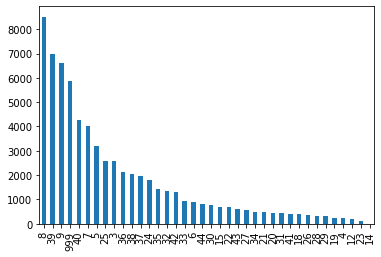

In [20]:
# to count the TripType values, we have to group the visits by VisitNumber
original_df.groupby("VisitNumber").TripType.mean().value_counts().plot(kind='bar')

In [21]:
original_df[original_df.TripType==8] #.groupby("VisitNumber").TripType.mean().value_counts()
#original_df.groupby("VisitNumber").TripType.mean()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
1,8,9,Friday,1.070081e+09,1,IMPULSE MERCHANDISE,115.0
2,8,9,Friday,3.107000e+03,1,PRODUCE,103.0
3,8,9,Friday,4.011000e+03,1,PRODUCE,5501.0
4,8,10,Friday,6.414410e+09,1,DSD GROCERY,2008.0
5,8,10,Friday,2.800054e+09,1,"CANDY, TOBACCO, COOKIES",115.0
...,...,...,...,...,...,...,...
453245,8,191289,Sunday,6.112696e+10,1,DSD GROCERY,3467.0
453246,8,191291,Sunday,4.011000e+03,1,PRODUCE,5501.0
453247,8,191291,Sunday,7.874235e+09,1,DAIRY,1508.0
453409,8,191347,Sunday,4.190008e+09,1,DAIRY,1512.0


In [22]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453411 entries, 0 to 453410
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   TripType               453411 non-null  int64  
 1   VisitNumber            453411 non-null  int64  
 2   Weekday                453411 non-null  object 
 3   Upc                    450559 non-null  float64
 4   ScanCount              453411 non-null  int64  
 5   DepartmentDescription  452439 non-null  object 
 6   FinelineNumber         450559 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 24.2+ MB


**Unbalanced!!!**

Create a function to load the datasets.

**Some important decisions made here**:
1. We will use one hot encoding for Weekday and DepartmentDescription. All transformations are applied to the training and testing datasets...
1. We are handling NaN's as another category. This may not be the best approach.
1. We may have multiple records for one single visit and the goal is to classify all those records the exact same way. Therefore, we will prepare the data in a way that all the information for a visit is in the same record.
1. Based on the last bullet, we will count the DepartmentDescription for all items acquired in the same visit.
1. We drop the Upc and FinelineNumber to simplify the process. You may use it as they have a lot of information (may be using one-hot encoding for them as well)

The following operations will be performed in a function. Anyway, we present them here so that we can see them in action:

First, we drop the columns. We include TripType as we are going to treat it differently:

In [23]:
#df = original_df.drop(["Upc", "FinelineNumber", "TripType"], axis=1)
df = original_df.drop(["TripType"], axis=1)

In [24]:
df

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,9,Friday,1.070081e+09,1,IMPULSE MERCHANDISE,115.0
2,9,Friday,3.107000e+03,1,PRODUCE,103.0
3,9,Friday,4.011000e+03,1,PRODUCE,5501.0
4,10,Friday,6.414410e+09,1,DSD GROCERY,2008.0
...,...,...,...,...,...,...
453406,191344,Sunday,7.315096e+10,1,BEAUTY,3405.0
453407,191344,Sunday,6.505300e+10,1,WIRELESS,1712.0
453408,191344,Sunday,7.918131e+09,1,BEAUTY,3405.0
453409,191347,Sunday,4.190008e+09,1,DAIRY,1512.0


Now, we create the dummy columns

In [25]:
df = df[df['Upc'].notna()]

In [26]:
df.dtypes

VisitNumber                int64
Weekday                   object
Upc                      float64
ScanCount                  int64
DepartmentDescription     object
FinelineNumber           float64
dtype: object

In [27]:
df = pd.get_dummies(df, columns=["DepartmentDescription"], dummy_na=False)

In [28]:
df.head()

,VisitNumber,Weekday,Upc,ScanCount,FinelineNumber,DepartmentDescription_1-HR PHOTO,DepartmentDescription_ACCESSORIES,DepartmentDescription_AUTOMOTIVE,DepartmentDescription_BAKERY,DepartmentDescription_BATH AND SHOWER,...,DepartmentDescription_SEAFOOD,DepartmentDescription_SEASONAL,DepartmentDescription_SERVICE DELI,DepartmentDescription_SHEER HOSIERY,DepartmentDescription_SHOES,DepartmentDescription_SLEEPWEAR/FOUNDATIONS,DepartmentDescription_SPORTING GOODS,DepartmentDescription_SWIMWEAR/OUTERWEAR,DepartmentDescription_TOYS,DepartmentDescription_WIRELESS
0,5,Friday,6.811315e+10,-1,1000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,Friday,1.070081e+09,1,115.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,Friday,3.107000e+03,1,103.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,Friday,4.011000e+03,1,5501.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,Friday,6.414410e+09,1,2008.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, we group by the VisitNumber and Weekday (they should be the same), and add all values for ScanCount, and the one-hot encoding of DepartmentDescriptioin

In [29]:
df = df.groupby(["VisitNumber", "Weekday"], as_index=False).sum()

In [30]:
df

,VisitNumber,Weekday,Upc,ScanCount,FinelineNumber,DepartmentDescription_1-HR PHOTO,DepartmentDescription_ACCESSORIES,DepartmentDescription_AUTOMOTIVE,DepartmentDescription_BAKERY,DepartmentDescription_BATH AND SHOWER,...,DepartmentDescription_SEAFOOD,DepartmentDescription_SEASONAL,DepartmentDescription_SERVICE DELI,DepartmentDescription_SHEER HOSIERY,DepartmentDescription_SHOES,DepartmentDescription_SLEEPWEAR/FOUNDATIONS,DepartmentDescription_SPORTING GOODS,DepartmentDescription_SWIMWEAR/OUTERWEAR,DepartmentDescription_TOYS,DepartmentDescription_WIRELESS
0,5,Friday,6.811315e+10,-1,1000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,Friday,1.070088e+09,3,5719.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10,Friday,1.700927e+10,3,10073.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,Friday,2.273895e+10,4,7499.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,Friday,1.832173e+11,7,15639.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66072,191329,Sunday,5.830656e+11,20,75311.0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
66073,191337,Sunday,2.659169e+11,27,113908.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
66074,191343,Sunday,4.516225e+11,9,33991.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66075,191344,Sunday,1.614572e+11,5,15127.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
def transform_data(train_data_fname, test_data_fname):
    df_train = pd.read_csv(train_data_fname)
    df_train['is_train_set'] = 1
    df_test = pd.read_csv(test_data_fname)
    df_test['is_train_set'] = 0

    # we  get the TripType for the train set. To do that, we group by VisitNumber and
    # then we get the max (or min or avg)
    y = df_train.groupby(["VisitNumber", "Weekday"], as_index=False).max().TripType

    # we remove the TripType now, and concat training and testing data
    # the concat is done so that we have the same columns for both datasets
    # after one-hot encoding
    df_train = df_train.drop("TripType", axis=1)
    df = pd.concat([df_train, df_test])
    
    df['FinelineNumber'].fillna(df['FinelineNumber'].mode()[0], inplace=True)
    df['Upc'].fillna(df['Upc'].mode()[0], inplace=True)
    
    # one-hot encoding for the DepartmentDescription
    df = pd.get_dummies(df, columns=["DepartmentDescription"],dummy_na=False)

    # now we add the groupby values
    df = df.groupby(["VisitNumber", "Weekday"], as_index=False).sum()

    # finally, we do one-hot encoding for the Weekday
    df = pd.get_dummies(df, columns=["Weekday"], dummy_na=False)

    # get train and test back
    df_train = df[df.is_train_set != 0]
    df_test = df[df.is_train_set == 0]
    
    X = df_train.drop(["is_train_set"], axis=1)
    yy = None
    XX = df_test.drop(["is_train_set"], axis=1)

    return X, y, XX, yy

Load the data...

In [34]:
X, y, XX, yy = transform_data("../data/train.csv", "../data/test.csv")

In [35]:
X.shape

(67029, 79)

In [36]:
#Verifico un numero de visito de ejemplo
X[X.VisitNumber==9]

,VisitNumber,Upc,ScanCount,FinelineNumber,DepartmentDescription_1-HR PHOTO,DepartmentDescription_ACCESSORIES,DepartmentDescription_AUTOMOTIVE,DepartmentDescription_BAKERY,DepartmentDescription_BATH AND SHOWER,DepartmentDescription_BEAUTY,...,DepartmentDescription_SWIMWEAR/OUTERWEAR,DepartmentDescription_TOYS,DepartmentDescription_WIRELESS,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
3,9,1.070088e+09,3,5719.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Create the model and evaluate it

In [37]:
# split training dataset into train and "validation" 
# (we won't be using validation set in this example, because of the cross-validation;
# but it could be useful for you depending on your approach)
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
X_train.shape

(46920, 79)

In [39]:
# results dataframe is used to store the computed results
results = pd.DataFrame(columns=('clf', 'best_acc'))

In [54]:
# we will use a DesicionTree to classify and GridSearch to determine the parameters
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

tree_param = {'criterion':('gini', 'entropy'), 'min_samples_leaf':(1, 3, 5),
              'min_samples_split':(50,100,200), 'max_features':('sqrt','log2',None) } # 'splitter':['random'] 
#tree_param = {'criterion':['entropy'],'max_features':('sqrt','log2',None) }
tree = DT(random_state=42)
tree_clf = GridSearchCV(tree, tree_param, cv=3, scoring='accuracy', n_jobs=-1) #scoring='balanced_accuracy')
tree_clf.fit(X_train, y_train)
best_tree_clf = tree_clf.best_estimator_

In [55]:
print('Best Decision Tree accuracy: ', tree_clf.best_score_)
print(best_tree_clf)
results = results.append({'clf': best_tree_clf, 'best_acc': tree_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])

Best Decision Tree accuracy:  0.6375319693094629
DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=100,
                       random_state=42)
The best classifier so far is: 
DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=100,
                       random_state=42)


**And finally**, we predict the unknown label for the testing set

In [56]:
X.shape, XX.shape

((67029, 79), (28645, 79))

In [57]:
preds = results.clf.iloc[0].predict(XX)

**Ejecucion Random Forest**

In [40]:
X_train.shape

(46920, 79)

In [41]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100,random_state=42)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [42]:
from sklearn import metrics
# prediction on test set
preds=clf.predict(X_valid)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_valid, preds))

Accuracy: 0.6976478193843553


In [43]:
preds=clf.predict(XX)

In [86]:
#Verificamos las features mas importantes
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
dffeature_imp=pd.DataFrame(feature_imp)
dffeature_imp.columns=['Importancia']
dffeature_imp

,Importancia
ScanCount,0.151709
FinelineNumber,0.111790
Upc,0.101309
VisitNumber,0.058649
DepartmentDescription_DSD GROCERY,0.031516
...,...
DepartmentDescription_MENSWEAR,0.000461
DepartmentDescription_CONCEPT STORES,0.000377
DepartmentDescription_OTHER DEPARTMENTS,0.000205
DepartmentDescription_SEASONAL,0.000012


In [87]:
#Sacamos las features menos importantes
dict_features_frecuentas = dffeature_imp['Importancia'].nsmallest(4).sort_values(ascending=True)

In [88]:
pd.DataFrame(dict_features_frecuentas).index

Index(['DepartmentDescription_HEALTH AND BEAUTY AIDS',
       'DepartmentDescription_SEASONAL',
       'DepartmentDescription_OTHER DEPARTMENTS',
       'DepartmentDescription_CONCEPT STORES'],
      dtype='object')

In [89]:
X_train_new = X_train.copy()
X_train_new.shape

(46920, 79)

In [90]:
X_train_new.drop(pd.DataFrame(dict_features_frecuentas).index, axis=1, inplace=True)

In [91]:
X_train_new.shape

(46920, 75)

In [92]:
#Create a Gaussian Classifier
clf_new=RandomForestClassifier(n_estimators=100,random_state=42)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_new.fit(X_train_new,y_train)

RandomForestClassifier(random_state=42)

In [93]:
X_valid_new = X_valid.copy()
X_valid_new.drop(pd.DataFrame(dict_features_frecuentas).index, axis=1, inplace=True)

In [94]:
# prediction on test set
preds_new=clf_new.predict(X_valid_new)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_valid, preds_new))

Accuracy: 0.6997861653985777


**Ejecucion Bosst Random Forest**

In [45]:
import xgboost as xgb

In [46]:
xg_reg=xgb.XGBRFClassifier(learning_rate=0.2, subsample=0.8, colsample_bynode=0.8, reg_lambda=1e-05,n_jobs=-1)

In [47]:
xg_reg.fit(X_train, y_train)

XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', learning_rate=0.2, max_delta_step=0,
                max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=-1,
                num_parallel_tree=100, objective='multi:softprob',
                random_state=0, reg_alpha=0, scale_pos_weight=None,
                tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
#y_t_predicted = xg_reg.predict(X_train)
preds = xg_reg.predict(X_valid)

In [51]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def Metrics(y_real, y_pred, name='Entrenamiento'):
    '''Imprime las métricas comunes (Ac, Pr, Re, F1, CM)
    dados los Target y sus predicciones.'''
    print('Métricas {}:'
          '\n {}'
          '\n Confusion Matrix: \n{}'.format(
              name, classification_report(y_real, y_pred, digits=3), 
              confusion_matrix(y_real, y_pred)))

In [52]:
Metrics(y_valid,preds)

Métricas Entrenamiento:
               precision    recall  f1-score   support

           3      0.893     0.994     0.940       794
           4      0.833     0.373     0.515        67
           5      0.735     0.848     0.788       976
           6      0.801     0.758     0.779       260
           7      0.636     0.597     0.616      1205
           8      0.650     0.833     0.731      2540
           9      0.658     0.541     0.594      1968
          12      0.500     0.061     0.109        49
          14      0.000     0.000     0.000         1
          15      0.582     0.348     0.436       204
          18      0.526     0.413     0.463       121
          19      0.588     0.400     0.476        75
          20      0.637     0.608     0.622       130
          21      0.602     0.684     0.640       155
          22      0.588     0.374     0.457       206
          23      0.462     0.692     0.554        26
          24      0.573     0.565     0.569       581
  

C:\Users\dyvanoff\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The last thing we do is generating a file that should be *submitted* on kaggle

**Prueba con BaggingClassifier**

In [81]:
from sklearn.ensemble import BaggingClassifier

bbc = BaggingClassifier(n_estimators=10, random_state=42)
 
#Train the classifier.
bbc.fit(X, y)
preds = bbc.predict(X_valid)


In [82]:
bbc.score(X_train, y_train)

0.9772165387894288

In [83]:
bbc.score(X_valid,y_valid)

0.9767765677060023

**The last thing we do is generating a file that should be *submitted* on kaggle**

In [44]:
XX.shape, preds.shape

((28645, 79), (28645,))

In [45]:
submission = pd.DataFrame(list(zip(XX.VisitNumber, preds)), columns=["VisitNumber", "TripType"])

In [46]:
submission.shape

(28645, 2)

In [47]:
submission.to_csv("../data/submission.csv", header=True, index=False)

**LINEAS DE INVESTIGACION ADICIONAL**

**Optimizando hyperparametros con optimizacion bayesiana**

In [ ]:
#Import libraries
from bayes_opt import BayesianOptimization
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import cross_val_scorev

In [ ]:
#Bayesian optimization
def bayesian_optimization(dataset, function, parameters):
   X_train, y_train, X_test, y_test = dataset
   n_iterations = 5
   gp_params = {"alpha": 1e-4}

   BO = BayesianOptimization(function, parameters)
   BO.maximize(n_iter=n_iterations, **gp_params)

   return BO.max

In [ ]:
def rfc_optimization(cv_splits):
    def function(n_estimators, max_depth, min_samples_split):
        return cross_val_score(
               RandomForestClassifier(
                   n_estimators=int(max(n_estimators,0)),                                                               
                   max_depth=int(max(max_depth,1)),
                   min_samples_split=int(max(min_samples_split,2)), 
                   n_jobs=-1, 
                   random_state=42,   
                   class_weight="balanced"),  
               X=X_train, 
               y=y_train, 
               cv=cv_splits,
               scoring="roc_auc",
               n_jobs=-1).mean()

    parameters = {"n_estimators": (10, 1000),
                  "max_depth": (1, 150),
                  "min_samples_split": (2, 10)}
    
    return function, parameters

In [ ]:
def xgb_optimization(cv_splits, eval_set):
    def function(eta, gamma, max_depth):
            return cross_val_score(
                   xgb.XGRFClassifier(
                       #objective="binary:logistic",
                       learning_rate=max(eta, 0),
                       gamma=max(gamma, 0),
                       max_depth=int(max_depth),                                               
                       seed=42,
                       nthread=-1,
                       scale_pos_weight = len(y_train[y_train == 0])/
                                          len(y_train[y_train == 1])),  
                   X=X_train, 
                   y=y_train, 
                   cv=cv_splits,
                   scoring="roc_auc",
                   fit_params={
                        "early_stopping_rounds": 10, 
                        "eval_metric": "auc", 
                        "eval_set": eval_set},
                   n_jobs=-1).mean()

    parameters = {"eta": (0.001, 0.4),
                  "gamma": (0, 20),
                  "max_depth": (1, 2000)}
    
    return function, parameters

In [ ]:
#Train model
dataset = (X_train, y_train, X_test, y_test)
cv_splits = 4
    
best_solution = bayesian_optimization(dataset, function, parameters)      
params = best_solution["params"]

model = RandomForestClassifier(
         n_estimators=int(max(params["n_estimators"], 0)),
         max_depth=int(max(params["max_depth"], 1)),
         min_samples_split=int(max(params["min_samples_split"], 2)), 
         n_jobs=-1, 
         random_state=42,   
         class_weight="balanced")

model.fit(X_train, y_train)
    


**Seleccion de Modelos**

In [45]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [46]:
seed=42
models = []
#models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF',RandomForestClassifier()))
#models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LDA: 0.433653 (0.007885)
KNN: 0.267157 (0.007055)
CART: 0.453048 (0.005166)
NB: 0.180371 (0.003839)
RF: 0.558632 (0.008749)
